# Basic Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from wordcloud import WordCloud

nlp = spacy.load('en_core_web_sm')

In [2]:
scripts_df = pd.read_csv('Data/Raw/simpsons_script_lines.csv', dtype = 'unicode')
episods_df = pd.read_csv('Data/Raw/simpsons_characters.csv', dtype = 'unicode')
characters_df = pd.read_csv('Data/Raw/simpsons_episodes.csv', dtype = 'unicode')
locations_df = pd.read_csv('Data/Raw/simpsons_locations.csv', dtype = 'unicode')

scripts_df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,true,464,3,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,true,9,3,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,true,464,3,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,true,9,3,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,true,40,3,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


## Ten Most Active Characters

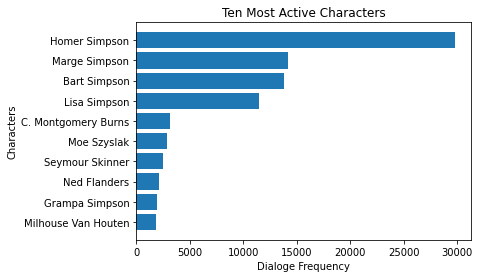

In [3]:
# Get character frequency
text_count_per_character = scripts_df['raw_character_text'].value_counts().sort_values(ascending = False)

# Draw bar plot for 10 most active characters
top = 10
plt.barh(text_count_per_character[:top].keys()[::-1], text_count_per_character[:top].values[::-1])
plt.title('Ten Most Active Characters')
plt.xlabel('Dialoge Frequency')
plt.ylabel('Characters')
plt.show()

## Next Ten Most Active Characters

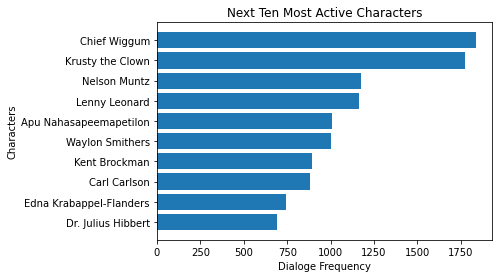

In [4]:
# Draw bar plot for 10 most active characters
top = 20
plt.barh(text_count_per_character[10:top].keys()[::-1], text_count_per_character[10:top].values[::-1])
plt.title('Next Ten Most Active Characters')
plt.xlabel('Dialoge Frequency')
plt.ylabel('Characters')
plt.show()

## Top Twenty Most Common Words

In [5]:
vectorizer = CountVectorizer(stop_words = 'english')
features = vectorizer.fit_transform(scripts_df[scripts_df['spoken_words'].isnull() == False]['spoken_words'])

# print(vectorizer.get_feature_names())

freqs = zip(vectorizer.get_feature_names(), features.sum(axis = 0).tolist()[0])
sorted_freqs = sorted(freqs, key = lambda x: -x[1])
print(sorted_freqs)

[('you', 45083), ('the', 42130), ('to', 27386), ('it', 20910), ('and', 19461), ('that', 17424), ('of', 16323), ('in', 12818), ('my', 12756), ('we', 12501), ('is', 12465), ('this', 11750), ('me', 10956), ('your', 10503), ('for', 10188), ('what', 9376), ('oh', 8629), ('re', 8541), ('on', 8284), ('can', 7708), ('no', 7553), ('have', 7524), ('but', 7412), ('be', 7214), ('don', 6929), ('all', 6845), ('just', 6697), ('do', 6466), ('with', 6451), ('are', 6410), ('ll', 6192), ('well', 6110), ('now', 6054), ('not', 6043), ('like', 6012), ('so', 5954), ('he', 5912), ('was', 5504), ('get', 5249), ('here', 5029), ('one', 4986), ('there', 4947), ('know', 4844), ('ve', 4689), ('up', 4679), ('at', 4553), ('out', 4544), ('they', 4506), ('hey', 4359), ('homer', 4252), ('if', 4207), ('right', 4067), ('go', 3772), ('got', 3728), ('how', 3656), ('bart', 3604), ('our', 3388), ('about', 3317), ('let', 3226), ('who', 3099), ('from', 3075), ('uh', 3075), ('good', 3057), ('see', 3030), ('yeah', 2995), ('as', 2

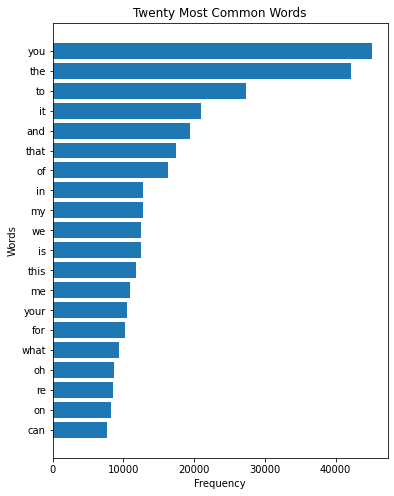

In [6]:
X, y = [], []

for freq in sorted_freqs[:20]:
    X.append(freq[0])
    y.append(freq[1])

fig = plt.figure(figsize = (6, 8))
plt.barh(X[::-1], y[::-1])
plt.title('Twenty Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

## WordClouds

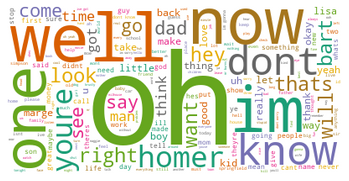

In [30]:
wc = WordCloud(
    background_color = "white",
    colormap = "Dark2",
    max_font_size = 150,
)

all_text = []
for text in scripts_df['normalized_text']:
    if str(text) != 'nan':
        all_text.append(text)

wc.generate(' '.join(all_text))

plt.imshow(wc, interpolation = 'spline36')
plt.axis("off")
plt.show()